### Bisection method

This method is discussed in the wk3 content.

In [1]:
function y = f1(x)
    y = exp(x) - x.^2 + -2.*x + 2;
end

This function will be hard to find the real roots for, but we can eyeball it first

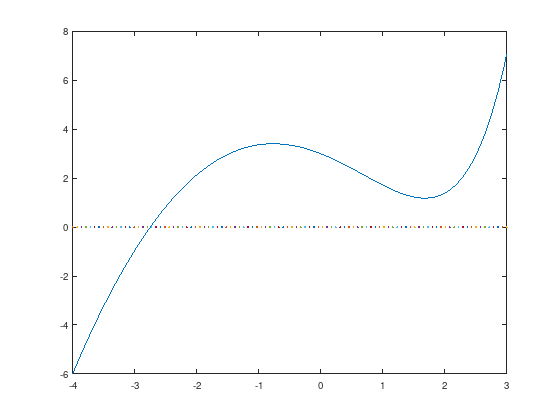

In [2]:
xSpace = linspace(-4,3);
plot(xSpace, f1(xSpace));
hold on;
plot(x=xSpace, y=0);

So, it seems to have a real root between $ -4 < x < -2 $ 

In [17]:
function interval = bisect(fun, interval)
    xMin = min(interval(1));
    xMax = max(interval(2));
    xHalf = (xMax - xMin)/2;
    
    # It is important to only consider the real part
    # That's because some functions take the root of x, so if x is negative then we end up with complex numbers.
    if (real(fun(xMin)) * real(fun(xMin+xHalf))) <= 0
        interval = [xMin, xMin+xHalf];
    else
        interval = [xMin+xHalf, xMax];
    end
end


function estimation = bisectionMethod(interval, fun, err=NaN, iter=NaN)
    usage = "\n call with error target: bisectionMethod([1,2], @f, err=10^-3) \n XOR \n call with iteration target: bisectionMethod([1,2], @f, iter=5)";
    if ~isa(fun, 'function_handle') || ...
       length(interval) ~= 2 || ...
       ~isa(interval, 'numeric') || ...
       isnan(err) && isnan(iter) || ...
       ~isnan(err) && ~isnan(iter)
            error(usage);
    end
    
    if ~isnan(err)
        while abs(interval(2) - interval(1)) > err
            interval = bisect(fun, interval);
        end
    elseif ~isnan(iter) 
        for i=1:iter
            interval = bisect(fun, interval);
        end
    else
        error(usage);
    end
    
    xHalf = min(interval) + (max(interval) - min(interval))/2;
    
    estimation = xHalf; 
end

In [18]:
xRoot = bisectionMethod([-4,-2],@f1,0.001,NaN);

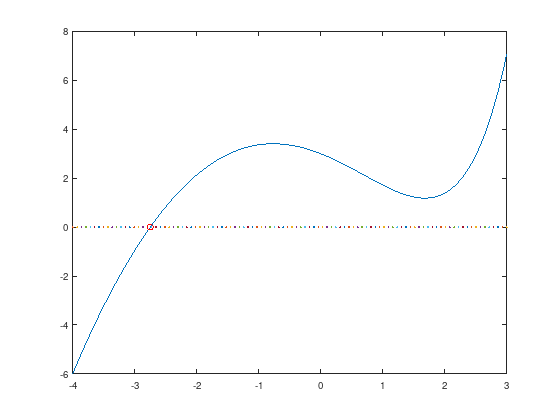

In [19]:
xSpace = linspace(-4,3);
plot(xSpace, f1(xSpace));
hold on;
plot(x=xSpace, y=0);
plot(xRoot,0, "ro")

### Another example

In [20]:
function y = f2(x)
    y = sqrt(x) + x.^3 + -6.*x - 3;
end

xRoot = bisectionMethod([-1.0001,1.0000001],@f2,NaN,15);

-0.5240


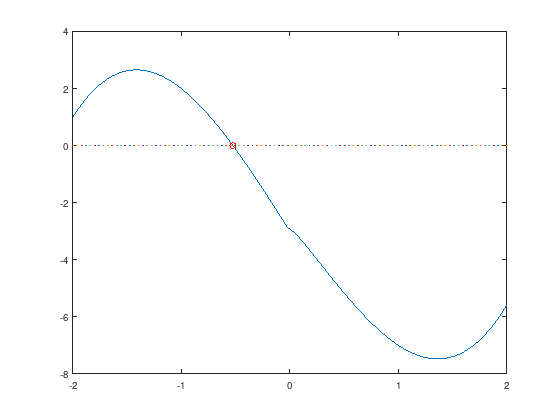

In [21]:
xSpace = linspace(-2,2);
plot(xSpace, f2(xSpace));
hold on;
plot(x=xSpace, y=0);
plot(xRoot,0, "ro")